# Adding new columns to King County housing Data

This notebook serves the purpose of creating an updated King County housing data with 3 extra columns containing city & neighborhood the property is in. The geoplots contained in the main notebook is also programmed in this notebook.

## Data Understanding

### 1. King County Housing data ([kc_house_data.csv](https://github.com/hanis-z/Phase-2-project/blob/main/data/kc_house_data.csv))
**Source:** This data was provided to us by Flatiron School. This data file is available in the project repo in the folder "data". 

**Contents:**

### 2. Incorporated & Unincorporated cities in King county
**Source:** We downloaded this data from [King County GIS website]( https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::cities-and-unincorporated-king-county-city-kc-area/explore?location=47.430582%2C-121.809200%2C10.02). The data is also easily accessible in our project repo in the folder "data".

**Contents:**

### 3. Neighborhood Map of Seattle
**Source:** We attained this data from [Seattle city GIS website](https://data-seattlecitygis.opendata.arcgis.com/datasets/neighborhood-map-atlas-districts/explore?location=47.628714%2C-122.338313%2C11.43]). This data is also easily accessible in our project repo in the folder "data".

**Contents:**


### Importing python libraries required for the analysis.

**Note:** To ensure that all packages are loaded successfully, please ensure that you are in the right python environment. For more reference, refer the (how-to-set-environment)[link to the file] to ensure you have the correct working environment to run this notebook.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import fiona
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import mapclassify as mc
import geoplot.crs as gcrs
import geoplot as gplt
import contextily as cx

## Data Exploration & Preparation


### Load King County Housing data

In [12]:
df = pd.read_csv('data/kc_house_data.csv')

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We will create a column with the coordinate zipped and another column with the latitude and longitude of each property in geometric (point) format to ease the process of transforming the dataframe to geopandas data frame later.

In [14]:
#Create columns with zipped coordinates and geometric coordinate
df['coord'] = list(zip(df.long,df.lat))
df['geometry'] = df.apply(lambda x: Point((x.long, x.lat)), axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Transform housing data to a geodataframe

We transform the housing dataframe to geopandas dataframe with Coordinate Reference System (CRS) "EPSG: 4326". Then we set the CRS to ["EPSG: 32148"](https://www.spatialreference.org/ref/epsg/nad83-washington-north/) to do spatial calculations in the metric system instead of in deg latitude/longitude.

In [16]:
housing_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")
housing_gdf.to_crs(epsg = 32148, inplace = True)

In [17]:
housing_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   date           21597 non-null  object  
 2   price          21597 non-null  float64 
 3   bedrooms       21597 non-null  int64   
 4   bathrooms      21597 non-null  float64 
 5   sqft_living    21597 non-null  int64   
 6   sqft_lot       21597 non-null  int64   
 7   floors         21597 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21534 non-null  object  
 10  condition      21597 non-null  object  
 11  grade          21597 non-null  object  
 12  sqft_above     21597 non-null  int64   
 13  sqft_basement  21597 non-null  object  
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   17755 non-null  float64 
 16  zipcode        21597 non-null  int64   
 17  lat            21597 no

### Load shapefile data for cities in King county

In [18]:
#Read the file in using geopandas
kc_cities_gdf = gpd.read_file('data/Cities_and_Unincorporated_King_County___city_kc_area/Cities_and_Unincorporated_King_County___city_kc_area.shp')

#Transform the crs, similar to housing gdf
kc_cities_gdf.to_crs(epsg = 32148, inplace = True)

In [19]:
kc_cities_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    100 non-null    int64   
 1   JURIS       100 non-null    object  
 2   CITYNAME    100 non-null    object  
 3   SHAPE_Leng  100 non-null    float64 
 4   SHAPE_Area  100 non-null    float64 
 5   geometry    100 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 4.8+ KB


In [20]:
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331..."
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403..."
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661..."
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326..."
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389..."


#### Note

Unincorporated cities in King County is labeled "King County" in the dataset. King County's official definition of Unincorporated cities is as follows:

"Rural unincorporated King County covers central and eastern King County and Vashon Island – areas outside the Urban Growth Boundary. These areas are desig- nated Rural, Agricultural or Forest Resource by the King County Comprehensive Plan."

We will rename unincorporated cities in king county to "Uincorporated City"

In [21]:
#View value counts of each city
kc_cities_gdf['CITYNAME'].value_counts()

King County         38
Enumclaw             7
Kent                 6
Carnation            3
Snoqualmie           3
Redmond              3
Black Diamond        2
Bothell              2
Des Moines           2
Duvall               2
Renton               2
Skykomish            2
Newcastle            1
Normandy Park        1
Pacific              1
Algona               1
Seattle              1
Shoreline            1
Maple Valley         1
Sammamish            1
SeaTac               1
Tukwila              1
Woodinville          1
North Bend           1
Lake Forest Park     1
Milton               1
Mercer Island        1
Medina               1
Auburn               1
Kenmore              1
Kirkland             1
Issaquah             1
Hunts Point          1
Federal Way          1
Covington            1
Clyde Hill           1
Burien               1
Bellevue             1
Beaux Arts           1
Yarrow Point         1
Name: CITYNAME, dtype: int64

In [22]:
#Rename "King County" to "Unincorporated City"
kc_cities_gdf['CITYNAME'] = kc_cities_gdf['CITYNAME'].str.replace('King County', 'Unincorporated City')

#Do a sniff test
kc_cities_gdf['CITYNAME'].unique()

array(['Algona', 'Auburn', 'Beaux Arts', 'Black Diamond', 'Bellevue',
       'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington',
       'Des Moines', 'Duvall', 'Enumclaw', 'Federal Way', 'Hunts Point',
       'Issaquah', 'Unincorporated City', 'Kent', 'Kirkland', 'Kenmore',
       'Lake Forest Park', 'Medina', 'Mercer Island', 'Milton',
       'Maple Valley', 'North Bend', 'Newcastle', 'Normandy Park',
       'Pacific', 'Redmond', 'Renton', 'Seattle', 'Shoreline',
       'Skykomish', 'Sammamish', 'Snoqualmie', 'SeaTac', 'Tukwila',
       'Woodinville', 'Yarrow Point'], dtype=object)

We want our model to incorporate distance of properties from Seattle city center in predicting house price. So, here, we'll find the coordinates of the center of Seattle.

In [23]:
#Get centroids of all cities in King County
kc_cities_gdf['centroid'] = kc_cities_gdf.centroid

#Sniff test
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331...",POINT (392791.391 32339.325)
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403...",POINT (395834.289 35069.659)
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661...",POINT (397138.139 65993.350)
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326...",POINT (414505.834 32499.483)
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389...",POINT (410359.775 35532.648)


In [24]:
#Seattle centroid

seattle_centroid = kc_cities_gdf[kc_cities_gdf['CITYNAME']=='Seattle']
seattle_centroid = seattle_centroid.iloc[0,-1]

#Sniff test
type(seattle_centroid)

shapely.geometry.point.Point

In [25]:
#Calculate distance of cities from seattle
kc_cities_gdf['dist_seattle'] = kc_cities_gdf['centroid'].distance(seattle_centroid)
kc_cities_gdf.head()

,OBJECTID,JURIS,CITYNAME,SHAPE_Leng,SHAPE_Area,geometry,centroid,dist_seattle
0,1,AL,Algona,38144.667179,3.641105e+07,"POLYGON ((393586.141 33607.604, 393361.732 331...",POINT (392791.391 32339.325),38210.789361
1,2,AU,Auburn,209231.046799,7.856892e+08,"POLYGON ((394617.054 40308.323, 394823.902 403...",POINT (395834.289 35069.659),36245.361339
2,3,BA,Beaux Arts,6720.785802,2.274707e+06,"POLYGON ((396999.450 66157.055, 396999.687 661...",POINT (397138.139 65993.350),11935.852118
3,4,BD,Black Diamond,6629.569588,2.412697e+06,"POLYGON ((414627.020 32686.155, 414626.838 326...",POINT (414505.834 32499.483),47120.537344
4,5,BD,Black Diamond,85786.107116,1.983661e+08,"POLYGON ((408171.066 38935.667, 408505.289 389...",POINT (410359.775 35532.648),42216.811494


In [26]:
# Check what the distance units are in
print(kc_cities_gdf.crs.axis_info[0].unit_name)

#Check the crs 
print(kc_cities_gdf.crs)

metre
epsg:32148


### Add city column to housing data frame

We will want to incorporate whether the city that property is in as a predictor in our model. So, let's add that in.

In [27]:
#Create dataframe placeholders
housing_city_gdf = None
temp_gdf = None

#Find the properties that are within the first city and assign it to our temporary df 
temp_gdf = housing_gdf[housing_gdf.geometry.within(kc_cities_gdf['geometry'][0])]

#Add city column to temporary df with the name of the first city.
temp_gdf['city'] = kc_cities_gdf['CITYNAME'][0]

#Assign temporary df to housing_city_neigh df
housing_city_gdf = temp_gdf

#Repeat steps above with the remaining cities for the remaining properties in Seattle.
for i in range(1,len(kc_cities_gdf)):
    temp_df=None
    temp_gdf = housing_gdf[housing_gdf.geometry.within(kc_cities_gdf['geometry'][i])]
    temp_gdf['city'] = kc_cities_gdf['CITYNAME'][i]
    
    #Concatenate temporary df to our main df with every loop.
    housing_city_gdf = pd.concat([housing_city_gdf,temp_gdf])
    
#sniff test
housing_city_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city
995,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,NONE,...,1920,NaN,98001,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.931 31962.041),Algona
1689,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,NONE,...,1992,0.0,98001,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.968 32163.527),Algona
1798,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,NONE,...,1959,0.0,98001,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.009 32617.902),Algona
2357,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,NONE,...,2002,NaN,98001,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.926 32069.029),Algona
2404,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,NONE,...,1947,0.0,98001,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.455 31575.759),Algona


In [28]:
housing_city_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 995 to 20444
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 

#### Calculate property from Seattle center

In [29]:
housing_city_gdf['dist_seattle'] = housing_city_gdf['geometry'].distance(seattle_centroid)
housing_city_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle
995,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,NONE,...,NaN,98001,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.931 31962.041),Algona,38586.298196
1689,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,NONE,...,0.0,98001,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.968 32163.527),Algona,38375.160433
1798,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,NONE,...,0.0,98001,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.009 32617.902),Algona,37943.562770
2357,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,NONE,...,NaN,98001,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.926 32069.029),Algona,38523.082722
2404,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,NONE,...,0.0,98001,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.455 31575.759),Algona,38938.369932


### [Seattle Neighborhood Data](https://data-seattlecitygis.opendata.arcgis.com/datasets/neighborhood-map-atlas-districts/explore?location=47.628714%2C-122.338313%2C11.43])

We would also like to explore how housing price within neighborhoods in Seattle vary, as an additional tool to help our clients decide where their ideal home location would be. 

So let's find the neighborhood the properties are in for the properties in Seattle.

#### Load Seattle Neighborhood data

In [30]:
#Load data using geopandas
neighborhood_gdf = gpd.read_file('data/Neighborhood_Map_Atlas_Districts/Neighborhood_Map_Atlas_Districts.shp')

#set CRS similar to housing geodataframe
neighborhood_gdf.to_crs(epsg = 32148, inplace = True)


In [31]:
#Sniff test
neighborhood_gdf.head()

,OBJECTID,L_HOOD,S_HOOD_ALT,Shape__Are,Shape__Len,geometry
0,28,Ballard,"Loyal Heights, Adams, Whittier Heights, West W...",1.046035e+08,59248.568772,"POLYGON ((382213.992 78585.122, 382234.451 785..."
1,29,Beacon Hill,"North Beacon Hill, Mid-Beacon Hill, South Beac...",1.479894e+08,78783.502732,"POLYGON ((388742.711 67312.959, 388791.365 673..."
2,30,Capitol Hill,"Portage Bay, Montlake, Madison Park, Broadway,...",1.068562e+08,75147.170565,"MULTIPOLYGON (((390104.347 72404.965, 390101.6..."
3,31,Cascade,"Westlake, Eastlake, South Lake Union",2.717920e+07,48680.288698,"POLYGON ((388229.979 73605.275, 388238.056 736..."
4,32,Central Area,"Madrona, Harrison/Denny-Blaine, Minor, Leschi,...",9.527258e+07,52688.475894,"POLYGON ((391343.204 70826.981, 391340.461 708..."


In [32]:
#View the list of neighborhoodabs
neighborhood_gdf['L_HOOD'].unique()

array(['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade',
       'Central Area', 'Delridge', 'Downtown', 'Interbay', 'Lake City',
       'Magnolia', 'Greater Duwamish', 'Northeast', 'Northgate',
       'Queen Anne', 'Rainier Valley', 'Seward Park', 'West Seattle',
       'Northwest', 'North Central', 'University District'], dtype=object)

We will create a new data frame containing just properties in Seattle, and find the neighborhood the property is in.

In [33]:
#Create dataframe placeholders
housing_city_neigh_gdf = None
temp_df=None #temporary df

#Find the properties that are within the first neighborhood and assign it to our temporary df 
temp_gdf = housing_city_gdf[housing_city_gdf.geometry.within(neighborhood_gdf['geometry'][0])]

#Add neighborhood column to temporary df with the name of the first neighborhood.
temp_gdf['neighborhood'] = neighborhood_gdf['L_HOOD'][0]

#Assign temporary df to housing_city_neigh df
housing_city_neigh_gdf = temp_gdf

# #Repeat steps above with the remaining neighborhoods  for the remaining properties in Seattle.
for i in range(1,len(neighborhood_gdf)):
    temp_df=None
    temp_gdf = housing_city_gdf[housing_city_gdf.geometry.within(neighborhood_gdf['geometry'][i])]
    temp_gdf['neighborhood'] = neighborhood_gdf['L_HOOD'][i]
    
#     #Concatenate temporary df to our main df with every loop.
    housing_city_neigh_gdf = pd.concat([housing_city_neigh_gdf,temp_gdf])

#sniff test
housing_city_neigh_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (382805.029 75680.055),Seattle,6525.170317,Ballard
32,461000390,6/24/2014,687500.0,4,1.75,2330,5000,1.5,NO,NONE,...,98117,47.6823,-122.368,1460,5000,"(-122.368, 47.6823)",POINT (384784.454 77008.039),Seattle,7172.767599,Ballard
33,7589200193,11/10/2014,535000.0,3,1.00,1090,3000,1.5,NO,NONE,...,98117,47.6889,-122.375,1570,5080,"(-122.375, 47.6889)",POINT (384273.699 77752.191),Seattle,7995.062287,Ballard
37,2768000400,12/30/2014,640000.0,4,2.00,2360,6000,2.0,NO,NONE,...,98107,47.6702,-122.362,1730,4700,"(-122.362, 47.6702)",POINT (385208.121 75654.048),Seattle,5774.377592,Ballard
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,NO,NONE,...,98117,47.6808,-122.384,1410,4080,"(-122.384, 47.6808)",POINT (383580.052 76865.384),Seattle,7314.436684,Ballard


In [34]:
#Check for duplicates
housing_city_neigh_gdf['id'].duplicated().sum()

49

In [35]:
#Remove duplicates the data
housing_city_neigh_gdf.drop_duplicates(subset='id',inplace =True)

#sniff test
housing_city_neigh_gdf['id'].duplicated().sum()


0

In [36]:
#Subset the dataframe to just id and neighborhood
housing_neigh = housing_city_neigh_gdf[['id','neighborhood']]
housing_neigh

,id,neighborhood
14,1175000570,Ballard
32,461000390,Ballard
33,7589200193,Ballard
37,2768000400,Ballard
52,7518505990,Ballard
...,...,...
20065,889000015,University District
20498,4092300211,University District
21224,7174800094,University District
21460,4092302096,University District


In [37]:
housing_neigh[housing_neigh['id'] == 9212900260]

,id,neighborhood
11,9212900260,Northeast


In [38]:
#Merge housing dataframe with neighborhood dataframe

housing_neigh_gdf = housing_city_gdf.merge(housing_neigh,left_on='id', right_on ='id', how='left')
housing_neigh_gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood
0,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,NONE,...,98001,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.931 31962.041),Algona,38586.298196,NaN
1,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,NONE,...,98001,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.968 32163.527),Algona,38375.160433,NaN
2,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,NONE,...,98001,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.009 32617.902),Algona,37943.562770,NaN
3,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,NONE,...,98001,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.926 32069.029),Algona,38523.082722,NaN
4,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,NONE,...,98001,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.455 31575.759),Algona,38938.369932,NaN


In [39]:
housing_neigh_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 0 to 21595
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 no

In [40]:
#sniff test
housing_neigh_gdf[housing_neigh_gdf['city'] == 'Seattle']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood
12531,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",POINT (392764.860 57828.084),Seattle,13919.262765,Rainier Valley
12532,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",POINT (388545.748 81237.743),Seattle,11633.422030,Northgate
12533,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",POINT (382543.894 59093.777),Seattle,11321.736351,West Seattle
12534,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,98115,47.6900,-122.292,1330,6000,"(-122.292, 47.69)",POINT (390505.698 77752.996),Seattle,9106.516296,Northeast
12535,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,...,98107,47.6700,-122.394,1360,4850,"(-122.394, 47.67)",POINT (382805.029 75680.055),Seattle,6525.170317,Ballard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19270,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,98136,47.5537,-122.398,2050,6200,"(-122.398, 47.5537)",POINT (382241.781 62758.508),Seattle,8023.729582,West Seattle
19271,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,98116,47.5773,-122.409,1330,1265,"(-122.409, 47.5773)",POINT (381467.755 65398.714),Seattle,6305.476591,West Seattle
19272,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",POINT (386473.050 78865.044),Seattle,8968.397044,Northwest
19273,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",POINT (389777.859 67136.026),Seattle,4800.005150,Central Area


In [41]:
#Create column if property in seattle or not
housing_neigh_gdf['in_seattle'] = housing_neigh_gdf['city'] == 'Seattle'

In [42]:
housing_gdf_complete = housing_neigh_gdf

In [43]:
housing_gdf_complete.shape

(21596, 27)

In [44]:
housing_gdf_complete.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood,in_seattle
0,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,NONE,...,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.931 31962.041),Algona,38586.298196,NaN,False
1,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,NONE,...,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.968 32163.527),Algona,38375.160433,NaN,False
2,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,NONE,...,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.009 32617.902),Algona,37943.562770,NaN,False
3,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,NONE,...,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.926 32069.029),Algona,38523.082722,NaN,False
4,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,NONE,...,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.455 31575.759),Algona,38938.369932,NaN,False


In [45]:
housing_gdf_complete.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 0 to 21595
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 no

In [47]:
# Export dataframe as csv
# housing_gdf_complete.to_csv('../data/housing_gdf_complete.csv') 

## Geopandas visualization

In [50]:

housing_gdf.to_crs(epsg = 4326, inplace = True)
housing_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
housing_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   date           21597 non-null  object  
 2   price          21597 non-null  float64 
 3   bedrooms       21597 non-null  int64   
 4   bathrooms      21597 non-null  float64 
 5   sqft_living    21597 non-null  int64   
 6   sqft_lot       21597 non-null  int64   
 7   floors         21597 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21534 non-null  object  
 10  condition      21597 non-null  object  
 11  grade          21597 non-null  object  
 12  sqft_above     21597 non-null  int64   
 13  sqft_basement  21597 non-null  object  
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   17755 non-null  float64 
 16  zipcode        21597 non-null  int64   
 17  lat            21597 no

In [54]:
scheme = mc.Quantiles(housing_gdf['price'], k=5)
scheme

Quantiles                       

        Interval           Count
--------------------------------
[  78000.00,  298910.00] |  4320
( 298910.00,  399897.00] |  4319
( 399897.00,  519000.00] |  4324
( 519000.00,  700436.00] |  4314
( 700436.00, 7700000.00] |  4320

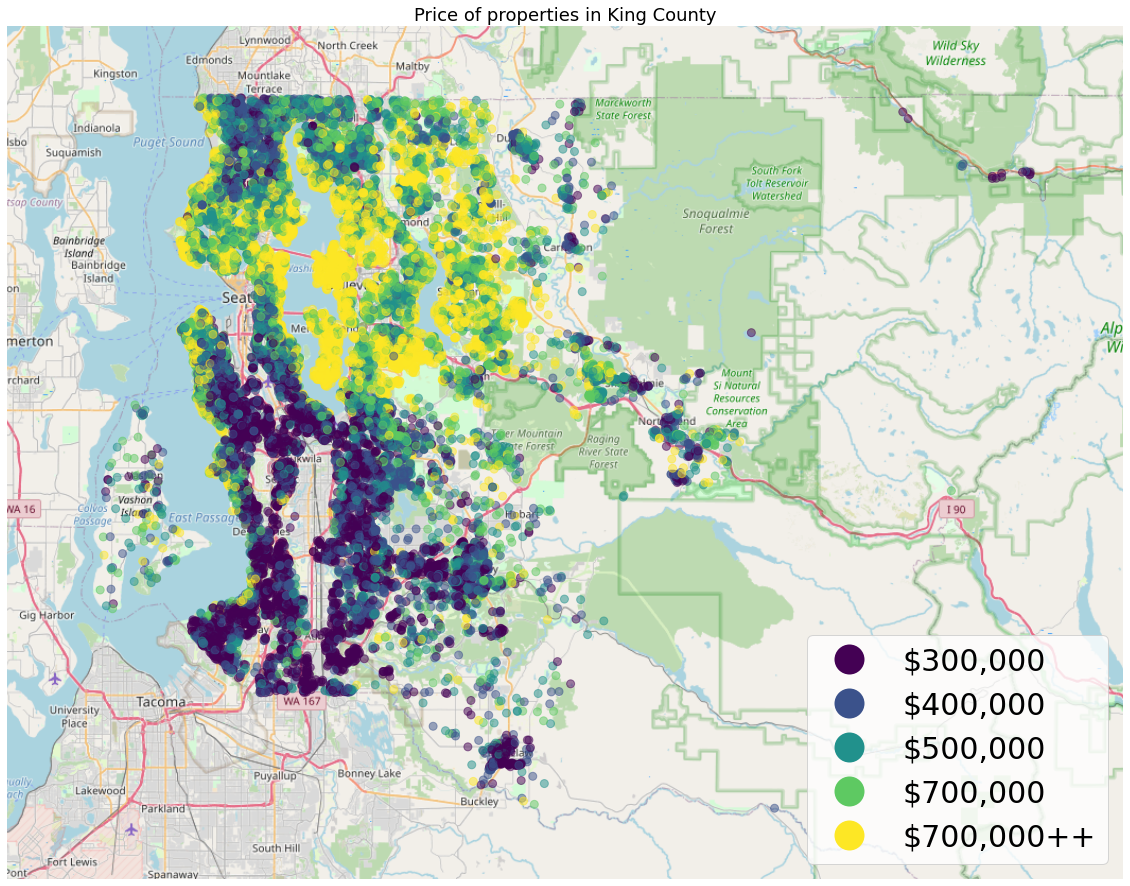

In [70]:
import geoplot.crs as gcrs
import geoplot as gplt
import contextily as cx


extent=(-122.5, 47, -122.0, 47.8)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.WebMercator())

gplt.webmap(
    housing_gdf,
    ax=ax,
    projection=gcrs.WebMercator()
)


gplt.pointplot(
    housing_gdf,
    ax=ax,
    alpha=0.5,
    hue='price',
    scheme=scheme,
    cmap='viridis',
    legend=True,
    legend_var='hue',
    legend_labels=['$300,000', '$400,000', '$500,000', '$700,000','$700,000++'],
    legend_kwargs={'frameon': True, 'loc': 'lower right', 'prop':{'size': 30},'markersize':30},
    s=8,
)


plt.title('Price of properties in King County', fontsize = 18)
plt.savefig('Images/property_price_map.jpg')
plt.savefig('Images/property_price_map.png')

In [73]:
housing_gdf_complete.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21596 entries, 0 to 21595
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21596 non-null  int64   
 1   date           21596 non-null  object  
 2   price          21596 non-null  float64 
 3   bedrooms       21596 non-null  int64   
 4   bathrooms      21596 non-null  float64 
 5   sqft_living    21596 non-null  int64   
 6   sqft_lot       21596 non-null  int64   
 7   floors         21596 non-null  float64 
 8   waterfront     19221 non-null  object  
 9   view           21533 non-null  object  
 10  condition      21596 non-null  object  
 11  grade          21596 non-null  object  
 12  sqft_above     21596 non-null  int64   
 13  sqft_basement  21596 non-null  object  
 14  yr_built       21596 non-null  int64   
 15  yr_renovated   17754 non-null  float64 
 16  zipcode        21596 non-null  int64   
 17  lat            21596 no

In [88]:
housing_df_seattle = housing_gdf_complete[housing_gdf_complete['city'] == 'Seattle']
median_seattle_neighborhood = housing_df_seattle.groupby('neighborhood').median()['price']
neighborhood_gdf_median = neighborhood_gdf.merge(median_seattle_neighborhood, left_on='L_HOOD', right_on = 'neighborhood' )
neighborhood_gdf_median.to_crs(epsg = 4326, inplace = True)
neighborhood_gdf_median.crs
neighborhood_gdf_median['coords'] = neighborhood_gdf_median['geometry'].apply(lambda x: x.representative_point().coords[:])
neighborhood_gdf_median['coords'] = [coords[0] for coords in neighborhood_gdf_median['coords']]

In [89]:

kc_cities_gdf.to_crs(epsg = 4326, inplace = True)

In [90]:
neighborhood_gdf_median.head()

,OBJECTID,L_HOOD,S_HOOD_ALT,Shape__Are,Shape__Len,geometry,price,coords
0,28,Ballard,"Loyal Heights, Adams, Whittier Heights, West W...",1.046035e+08,59248.568772,"POLYGON ((-122.40266 47.69602, -122.40236 47.6...",535000.0,"(-122.3868632018639, 47.677167256028)"
1,29,Beacon Hill,"North Beacon Hill, Mid-Beacon Hill, South Beac...",1.479894e+08,78783.502732,"POLYGON ((-122.31281 47.59581, -122.31216 47.5...",360000.0,"(-122.30462481585899, 47.5528770845677)"
2,30,Capitol Hill,"Portage Bay, Montlake, Madison Park, Broadway,...",1.068562e+08,75147.170565,"MULTIPOLYGON (((-122.29599 47.64184, -122.2960...",900000.0,"(-122.30042545059692, 47.63243830212015)"
3,31,Cascade,"Westlake, Eastlake, South Lake Union",2.717920e+07,48680.288698,"POLYGON ((-122.32124 47.65231, -122.32113 47.6...",607500.0,"(-122.32575763249822, 47.63541015486935)"
4,32,Central Area,"Madrona, Harrison/Denny-Blaine, Minor, Leschi,...",9.527258e+07,52688.475894,"POLYGON ((-122.27911 47.62786, -122.27915 47.6...",535000.0,"(-122.30028013751209, 47.603658650431704)"


<Figure size 720x1080 with 0 Axes>

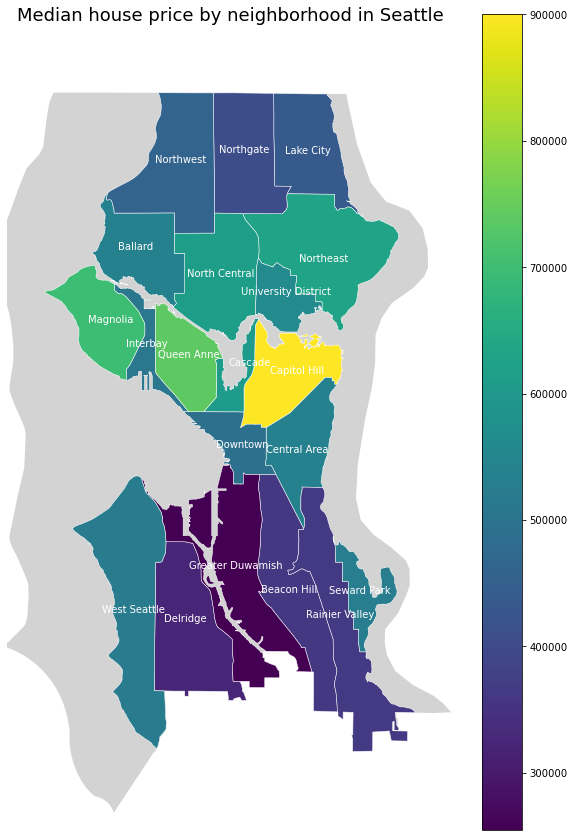

In [91]:
fig = plt.figure(figsize = (10,15))

ax1 = gplt.choropleth(
    neighborhood_gdf_median,
    figsize = (10,15),
    hue='price',
    cmap='viridis', linewidth=0.5,
    edgecolor='white',
    legend=True
)

kc_cities_gdf[kc_cities_gdf['CITYNAME']=='Seattle'].plot(ax = ax1,color="lightgrey", zorder=0)
for idx, row in neighborhood_gdf_median.iterrows():
    plt.annotate(text=row['L_HOOD'], xy=row['coords'],
                 horizontalalignment='center', color = 'w')


ax1.set_title("Median house price by neighborhood in Seattle", fontsize = 18)
plt.savefig('Images/mean_price_by_neighborhood_map.jpg')
plt.savefig('Images/mean_price_by_neighborhood_map.png')